In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

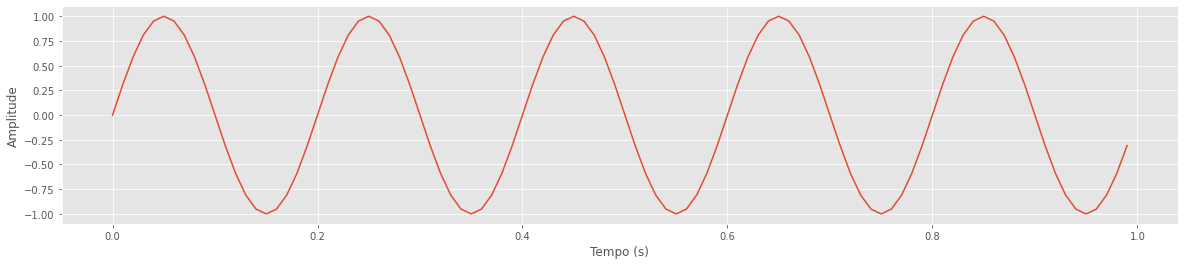

In [28]:
fs  = 100             #Frequência de amostragem
Ts  = 1/fs            #Período de amostragem

f0  = 5               #Frequência fundamental da onda
phi = -np.pi/2        #Fase da onda

t = np.arange(0,1,Ts)    #Vetor de tempo
x = np.cos(2*np.pi*f0*t+phi) #Onda cosseno

N = len(t)            #Número de amostras  

fig = plt.figure(figsize=(20,4))

plt.plot(t,x)
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.show()

In [29]:
#Transformada Discreta de Fourier utilizando fft
print(f"Tamanho do sinal: {N}")
X = np.fft.fft(x)
#É um número complexo
print(type(X[0]),X[0])

Tamanho do sinal: 100
<class 'numpy.complex128'> (2.792564921861288e-16+0j)


<span style="color:Orange"><b>O algoritmo da FFT necessita que $N$ seja uma potência de 2 para um cálculo eficiente da transformada. Pode-se fazer zero padding para que N seja uma potência de 2.</span>
    
> FFT (Fast Fourier Transform) refers to a way the discrete Fourier Transform (DFT) can be calculated efficiently, by using symmetries in the calculated terms. The symmetry is highest when n is a power of 2, and the transform is therefore most efficient for these sizes.

### **Módulo do Sinal** 

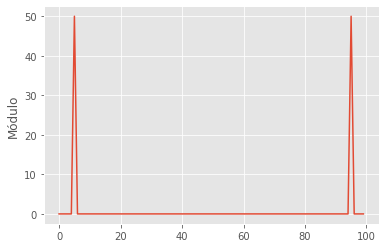

In [30]:
plt.plot(np.abs(X))
plt.ylabel("Módulo")
plt.show()

A transformada de fourier de um sinal real é uma função par, isto é, simétrico em relação ao eixo $y$. Entretanto, normalmente não apresentamos dessa maneira o módulo, para corrigir precisamos calcular as frequências.

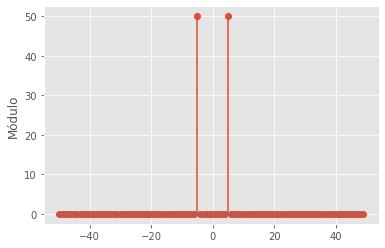

In [31]:
#Calcula o indice de frequências
freqs = np.fft.fftfreq(N,Ts)

plt.stem(freqs,np.abs(X))
plt.ylabel("Módulo")
plt.show()

As vezes queremos mostrar o eixo y em decibels

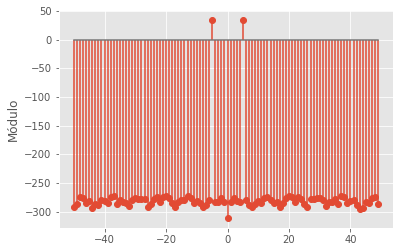

In [32]:
#Passa para decibel
X_dec = 20*np.log10(np.abs(X))
plt.stem(freqs, X_dec)
plt.ylabel("Módulo")
plt.show()

Agora perceba que a gente só precisa de metade desse espectro, pois existe simetria!

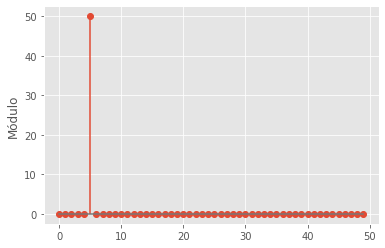

In [33]:
#Passa para decibel
plt.stem(freqs[:int(N/2)], np.abs(X[:int(N/2)]))
plt.ylabel("Módulo")
plt.show()

### **Fase do sinal** 

Recebe uma sequência com números complexos e retorna os ângulos em **radianos (Default)** ou **graus**.

In [37]:
print(f"Ângulos em Radianos: {np.round(np.angle(x)[5:15],2)}")

print(f"Ângulos em Graus: {np.round(np.angle(x,deg=True)[5:15],2)}")

Ângulos em Radianos: [0.   0.   0.   0.   0.   0.   3.14 3.14 3.14 3.14]
Ângulos em Graus: [  0.   0.   0.   0.   0.   0. 180. 180. 180. 180.]


>Unwrap **radian phase** by changing absolute jumps greater than ***discont*** to their 2*pi complement

Quando calculamos o ângulo de um número complexo estamos fazendo $(tan\frac{a}{b})$, mas se $\frac{a}{b}$ for múltiplo de $2\pi k, k \in \mathbb{Z}$, temos que o resultado é 0, isto é, a função não mostra que estamos dando uma volta no círculo trigonométrico. Esse fato gera descontinuidades no gráfico dos ângulos por isso que para entender ```delay``` precisamos fazer o ```unwrap``` do vetor de ângulos.

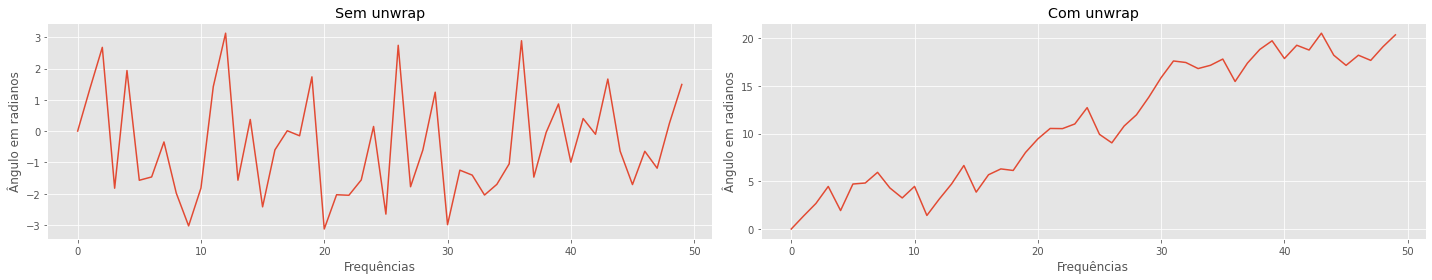

In [56]:
fig,axs = plt.subplots(1,2,figsize=(20,4))

#Só precisamos da metade!
X_ang = np.angle(X[:int(N/2)])
axs[0].plot(X_ang)
axs[1].plot(np.unwrap(X_ang))

axs[0].set_title("Sem unwrap")
axs[1].set_title("Com unwrap")

for ax in axs.flatten():
    ax.set_ylabel("Ângulo em radianos") 
    ax.set_xlabel("Frequências")

plt.tight_layout()
plt.show()

<span style="color:Orange"><b>Toda vez que a diferença entre x[1] - x[0] for maior que $\pi$ o unwrap ocorre. Como calcular a fase em radianos? </span>

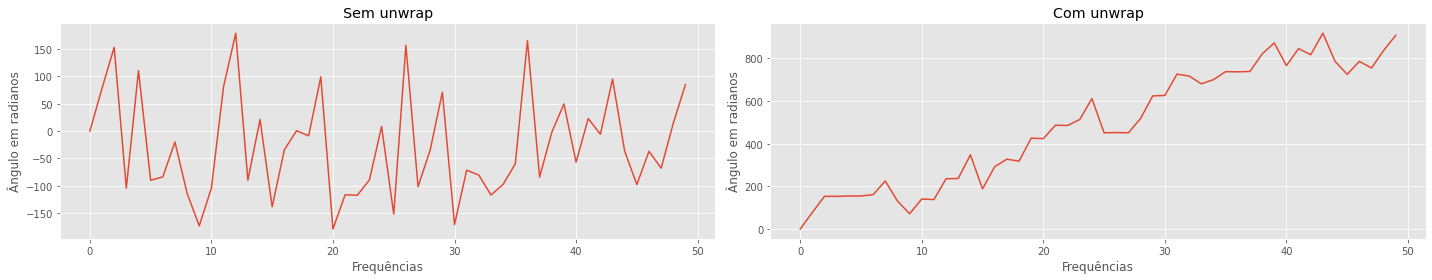

In [57]:
fig,axs = plt.subplots(1,2,figsize=(20,4))

#Só precisamos da metade!
X_ang = np.angle(X[:int(N/2)],deg=True)
axs[0].plot(X_ang)
axs[1].plot(np.unwrap(X_ang, discont=180))

axs[0].set_title("Sem unwrap")
axs[1].set_title("Com unwrap")

for ax in axs.flatten():
    ax.set_ylabel("Ângulo em radianos") 
    ax.set_xlabel("Frequências")

plt.tight_layout()
plt.show()

<span style="color:red"><b>Falta fazer um exemplo na mão do unwrap!</span>